In [1]:
import oceanwaves as ow, swan
import numpy as np, matplotlib.pyplot as plt
import datetime

In [2]:
help(ow)

Help on module oceanwaves:

NAME
    oceanwaves

DESCRIPTION
    Module for handling spectral ocean wave data. We adhere to the following convention:
     * directions:   nautical convention: CF units degrees_true
     * time:         UTC
     * coordinates:  speherical WGS84
     * energy units: [m2/Hz/deg]
     * methods for spectral parameters Hs(), Tm01, Tm02 
       use the trapezozidal rule to integrate the spectrum.

CLASSES
    builtins.object
        Spec0
        Spec1
        Spec2
    
    class Spec0(builtins.object)
     |  Class for spectral parameters
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |  
     |  __repr__(self)
     |  
     |  from_Spec(self, Spec)
     |  
     |  plot(self, fname=None, it=0, ix=0)
     |      plot parameter time series (to file)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictiona

In [4]:
#help(swan)

# Parametric (0 D)

In [5]:
# Define 0D spectrum, to generate 1D and 2D spectra
Sp0 = ow.Spec0()
Sp0.t     = datetime.datetime.strptime('19920516.130000','%Y%m%d.%H%M%S') # parse swan time notation
Sp0.Hs    = 1.
Sp0.Tp    = 10
Sp0.pdir  = 90+45
Sp0.ms    = 2
Sp0

<Spectrum0D  Hs=1.0 Tp=10 @ 1992-05-16 13:00:00 : "">

In [6]:
# save > load > plot again
with open(r'./testdata/Spec0D_scalar.tpar','w') as f:
    swan.to_file0D(Sp0,f)
with open(r'./testdata/Spec0D_scalar.tpar','r') as f:
    Sp0_copy = swan.from_file0D(f)
Sp0_copy

<Spectrum0D  shape:[nt,nx:(1,)]: "">

<Spectrum0D  shape:[nt,nx:(10,)]: "">

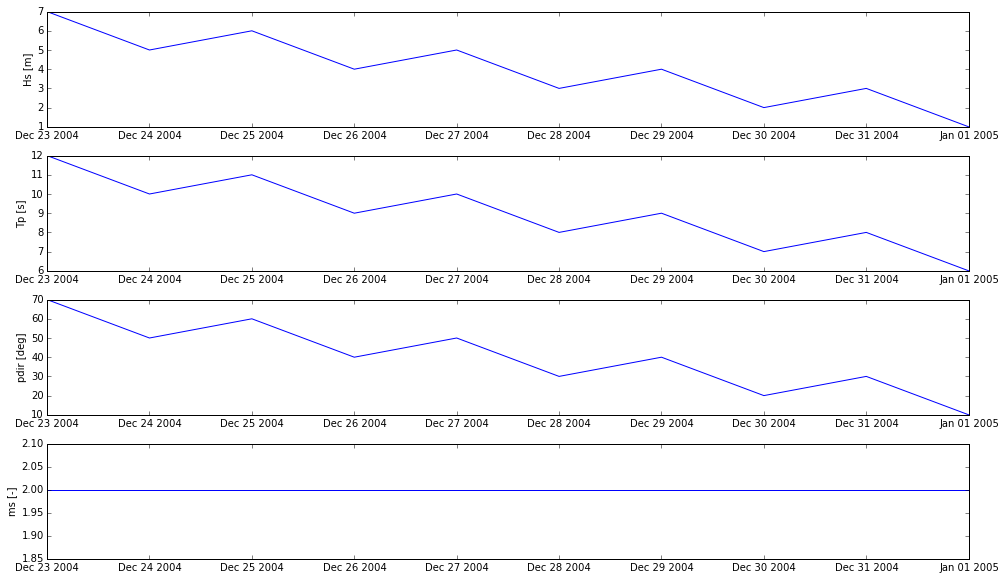

In [7]:
# Define 0D spectrum, to generate 1D and 2D spectra
Sp0t = ow.Spec0()
Sp0t.t     = [datetime.datetime(2005,1,1) - datetime.timedelta(days=x) for x in range(0, 10)]
Sp0t.Hs    = np.asarray([1., 3, 2, 4, 3, 5, 4, 6, 5, 7])
Sp0t.Tp    = Sp0t.Hs + 5
Sp0t.pdir  = Sp0t.Hs*10
Sp0t.ms    = 10*[2]
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)
Sp0t.plot()
Sp0t

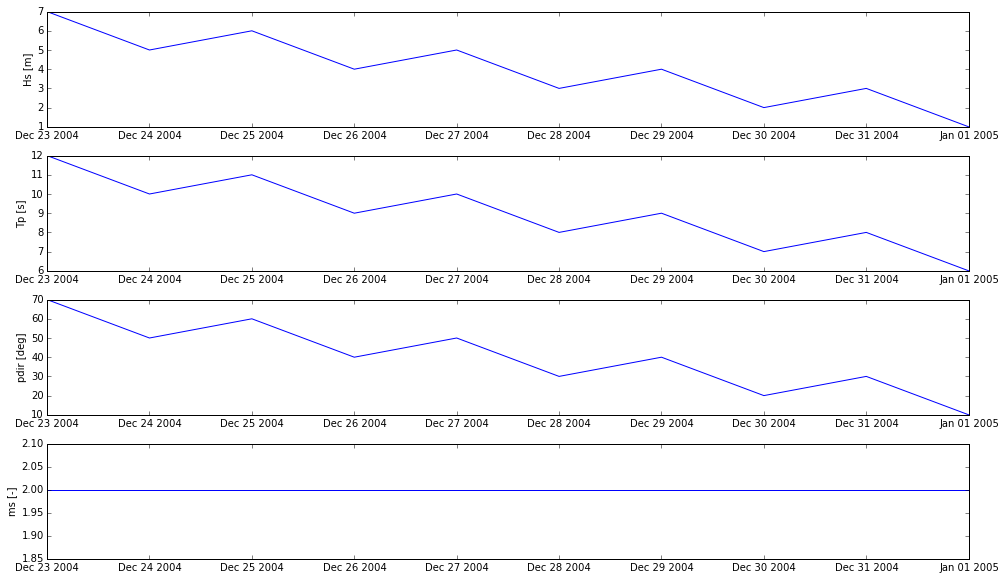

In [8]:
# save > load > plot again
with open(r'./testdata/Spec0_series.tpar','w') as f:
    swan.to_file0D(Sp0t,f)
with open(r'./testdata/Spec0_series.tpar','r') as f:
    Sp0t_copy = swan.from_file0D(f)
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)
Sp0t_copy.plot()    

## 1D JONSWAP

$$ H_{m0} = p_m*\gamma^np.exp(-0.5*(T_p*f-1)^2./\sigma(f,1/T_p,s_a,s_b)^2);$$

In [9]:
# generate and check
Sp1 = ow.Spec1(np.linspace(0.03,.3,100),lon=[4],lat=[52],t=[datetime.datetime(2016,1,1)])
Sp1.from_jonswap(Sp0.Hs, Sp0.Tp)
print('Hm0:',Sp0.Hs,' =?= ',Sp1.Hm0())
print('Tp :',Sp0.Tp,' =?= ',Sp1.Tp())
print('Tm01/02 :',Sp1.Tm01(), Sp1.Tm02())
Sp1

Hm0: 1.0  =?=  [[ 1.]]
Tp : 10  =?=  9.90990990991
Tm01/02 : [[ 8.54619153]] [[ 8.19669731]]


<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

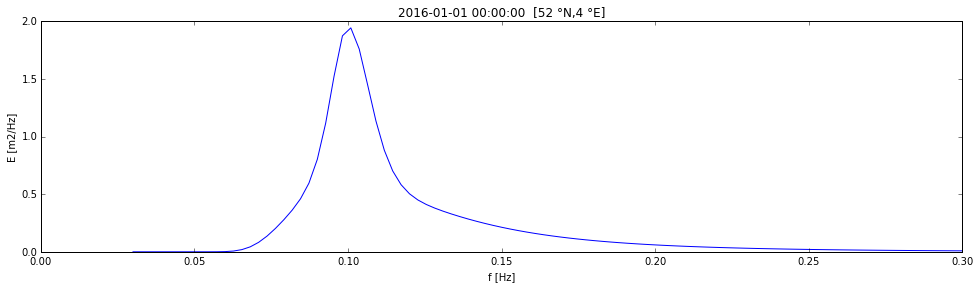

In [10]:
# use pyswan plot function
Sp1.plot('./testdata/Sp1.png') # directly to file, or to screen
%matplotlib inline 
fig=plt.figure()
fig.set_figwidth(16)
Sp1.plot()

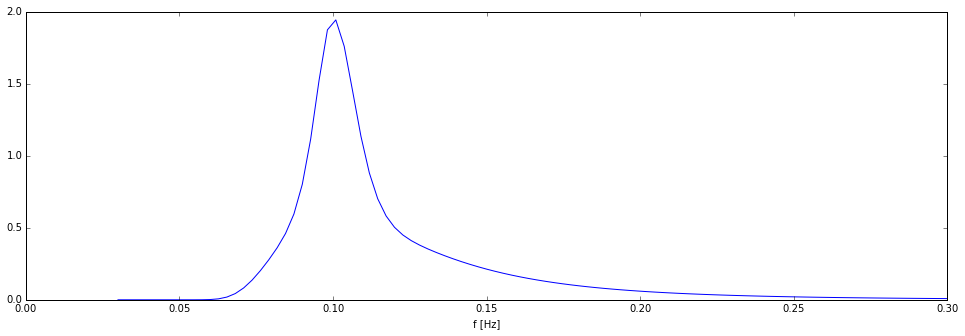

In [11]:
# plot yourselves
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(Sp1.f,Sp1.energy[0,0,:])
ax.set_xlabel('f [Hz]')

## DIRECTIONAL SPREADING

$$(2^m_s) * (\gamma(m_s/2+1))^2 / (pi * \gamma(m_s+1))$$

In [12]:
# define
ms = 2
units = 'deg'
dirs = [0,] + list(45+np.arange(0,136)*2.) + [360,]
cdir = ow.directional_spreading(dirs,Sp0.pdir,ms,units)

C:\Miniconda3\envs\vows\lib\site-packages\numpy\core\_methods.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_maximum(a, axis, None, out, keepdims)


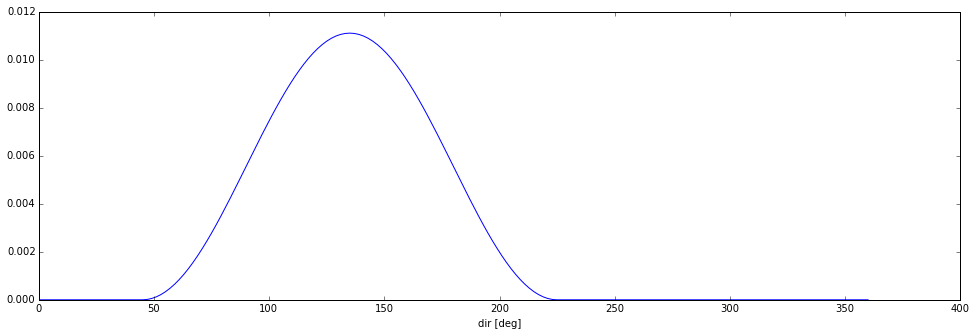

In [13]:
# plot
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(dirs,cdir)
ax.set_xlabel('dir [deg]')

## 2D JONSWAP

In [14]:
# generate and check
Sp2 = ow.Spec2(direction=np.asarray(dirs),f=Sp1.f,lon=[4],lat=[52],t=[datetime.datetime(2016,1,1)])
Sp2.from_jonswap(Sp0.Hs,Sp0.Tp,Sp0.pdir,ms)
print('Hm0:',Sp0.Hs,' =?= ',Sp2.Hm0())
print('Tp :',Sp0.Tp,' =?= ',Sp2.Tp())
print('pdir :',Sp0.pdir,' =?= ',Sp2.pdir())
print('Tm01/02 :',Sp1.Tm01(), Sp1.Tm02())
Sp2

Hm0: 1.0  =?=  [[ 1.]]
Tp : 10  =?=  9.90990990991
pdir : 135  =?=  135.0
Tm01/02 : [[ 8.54619153]] [[ 8.19669731]]


C:\Miniconda3\envs\vows\lib\site-packages\numpy\core\_methods.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_maximum(a, axis, None, out, keepdims)


<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:138]: "">

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


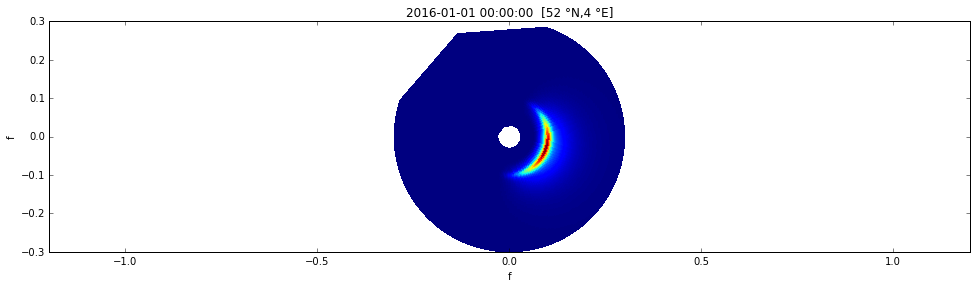

In [15]:
# use pyswan plot function
Sp2.plot('./testdata/Sp2.png') # directly to file, or to screen
%matplotlib inline 
fig=plt.figure()
fig.set_figwidth(16)
Sp2.plot()

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


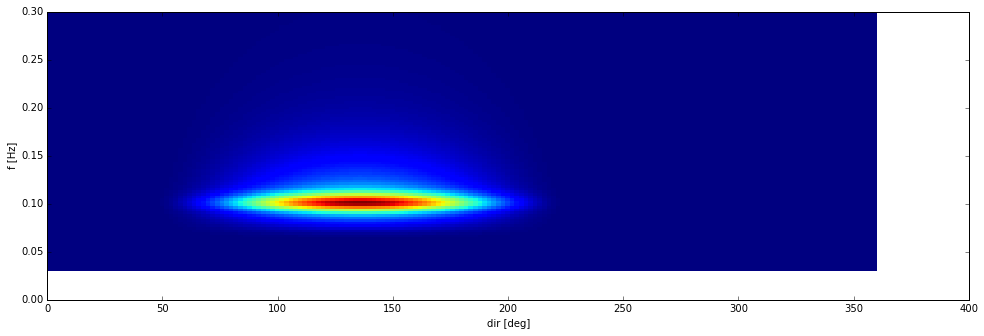

In [16]:
# Plot cartesian
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.pcolor(Sp2.direction,Sp2.f,Sp2.energy[0,0,:,:])
#plt.pcolor(Sp2.energy)
ax.set_ylabel('f [Hz]')
ax.set_xlabel('dir [deg]')

## Initialize includes check for dimension E againts t,x,f,directions

In [17]:
S0 = ow.Spec1()
S0

<Spectrum1D  shape:[nt:1,nx:1,nf:1]: "">

In [18]:
S1 = ow.Spec1()
S1

<Spectrum1D  shape:[nt:1,nx:1,nf:1]: "">

In [19]:
f = np.linspace(0.03,.3,100)
S1 = ow.Spec1(f=f)
S1

<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

In [20]:
S1 = ow.Spec1(f=f,energy=[[f]])
S1

<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

In [21]:
Sp2 = ow.Spec2()
Sp2

<Spectrum2D  shape:[nt:1,nx:1,nf:1,nd:1]: "">

In [22]:
Sp2 = ow.Spec2(f=f,direction=dirs)
Sp2

<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:138]: "">

In [23]:
Sp2 = ow.Spec2(f=f,direction=dirs,energy=[[np.zeros((len(f),len(dirs)))]])
Sp2

<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:138]: "">

In [24]:
# should go wrong: x and t missing from dimensions
S1 = ow.Spec1(f=f,energy=f)
S1

Exception: dimensions E (100,) do not match t,x,f (1, 1, 100)

In [25]:
# should go wrong: x and t missing from dimensions
Sp2 = ow.Spec2(f=f,direction=dirs,energy=np.zeros((len(f),len(dirs))))
Sp2

Exception: dimensions E (100, 138) do not match t,x,f,direction (1, 1, 100, 138)

# multidimensional

<Spectrum1D  shape:[nt:2,nx:1,nf:100]: "">

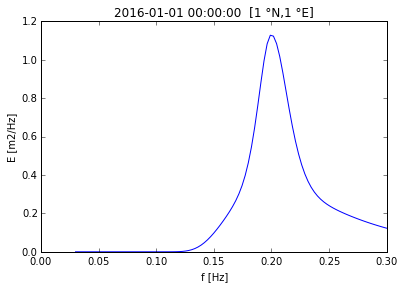

In [26]:
T1 = ow.Spec1(f=np.linspace(0.03,.3,100),t=[datetime.datetime(2016,1,1),datetime.datetime(2016,1,2)],lat=[1,2,3],lon=[1,2,3])
T1.from_jonswap(1,5)
%matplotlib inline
T1.plot()
T1

C:\Miniconda3\envs\vows\lib\site-packages\numpy\core\_methods.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_maximum(a, axis, None, out, keepdims)


<Spectrum2D  shape:[nt:2,nx:1,nf:100,nd:138]: "">

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


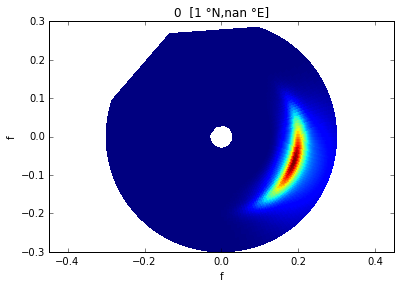

In [27]:
dirs = [0,] + list(45+np.arange(0,136)*2.) + [360,]
T2 = ow.Spec2(f=np.linspace(0.03,.3,100),t=[0,1],lat=[1,2,3],direction=dirs)
T2.from_jonswap(1,5,135,5)
%matplotlib inline
T2.plot()
T2